# Линейные модели классификации. Наивный байесовский классификатор.

Подключение необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Загрузка датасета с google drive

In [3]:
# fixed random state for reproducibility
np.random.seed(42)

In [2]:
url='https://drive.google.com/file/d/1BTng9OFk4gbwiTTnWpn4bo65P45txm9z/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

Получение информации о датасете

In [ ]:
print(f"Размер датасета: {data.shape}")

In [ ]:
print(data.info())

In [ ]:
print(data.describe())

In [ ]:
data.hist()

Разделяем признаки и таргеты

In [ ]:
X = data[['X1','X2']]
Y = data['Label']

Разделение датасета на обучающую и тестовую выборку

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)

Обучение модели логистической регрессии

In [ ]:
model = LogisticRegression(penalty = 'l2')
model.fit(X_train, Y_train)

Получение прогнозов: метки классов и вероятности

In [ ]:
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)

Оценим обученную модель с помощью метрики accuracy

In [ ]:
Acc_pred = accuracy_score(Y_test, Y_pred)
threshold = 0.5
Acc_prob = accuracy_score(Y_test, Y_prob[:,1] > 0.5)
print(f'Доля правильных ответов с использованием полученной метки класса:', np.round(Acc_pred, 4))
print(f'Доля правильных ответов с использованием вероятности:', np.round(Acc_prob, 4))
print('Коэффициенты модели:', model.coef_)

Построим график зависимости accuracy от значения выбранного порога

In [ ]:
thresholds = np.arange(0.01, 1, 0.01)
acc_LR_list = []

In [ ]:
for t in thresholds:
  acc_LR = accuracy_score(Y_test, Y_prob[:,1] > t)
  acc_LR_list.append(acc_LR)

In [ ]:
print(acc_LR_list)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, acc_LR_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: accuracy vs threshold')
plt.legend()
plt.grid(True)
plt.show()

Попробуем использовать наивный байесовский классификатор для решения той же задачи

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_pred = gnb.predict(X_test)
gnb_prob = gnb.predict_proba(X_test)
gnb_score = accuracy_score(Y_test, gnb_pred)
print(f'Доля правильных ответов NB classifier:', np.round(gnb_score, 4))

In [ ]:
acc_NB_list = []
for t in thresholds:
  acc_NB = accuracy_score(Y_test, gnb_prob[:,1] > t)
  acc_NB_list.append(acc_NB)

print(acc_NB_list)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, acc_NB_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Naive bayes: accuracy vs threshold')
plt.legend()
plt.grid(True)
plt.show()

# Задание для самостоятельной работы
На этом же датасете необходимо получить значение **accuracy > 0.9** на тестовой выборке. <br> Разрешается использовать **только** **логистическую регрессию**

0.9525

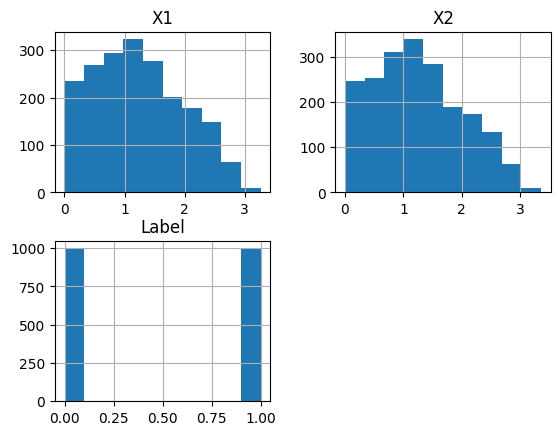

In [4]:
# "холмы" не очень похожы на норм.распр.
fixed_data = data.copy()
# попробуем взять признаки по модулю
fixed_data[['X1', 'X2']] = np.abs(fixed_data[['X1', 'X2']])
# это уже больше похоже на норм.распр.
fixed_data.hist()
# обучаем новую логистическуб регрессию
x_train, x_test, y_train, y_test = train_test_split(
    fixed_data[['X1', 'X2']],
    data['Label'],
    train_size=0.8,
    random_state=42,
)
model = LogisticRegression(penalty='l2')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_pred = accuracy_score(y_test, y_pred)
# проверяем
acc_pred